In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\EpicMzK\Desktop\Нетология Python\Stepik_DS\titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_class = df.groupby('Pclass', as_index=False).aggregate({'PassengerId': 'count', 'Survived': ["sum",'count']})
df_class['death'] = df_class['Survived']['count'] - df_class['Survived']['sum']
df_class

Pclass PassengerId Survived       death
               count      sum count      
0      1         216      136   216    80
1      2         184       87   184    97
2      3         491      119   491   372

# 1 

Text(0.5, 0, 'Число смертей')

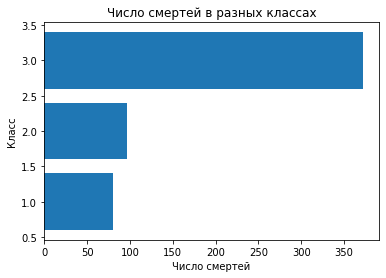

In [5]:
plt.barh(df_class['Pclass'], df_class['death'])
plt.title('Число смертей в разных классах')
plt.ylabel('Класс')
plt.xlabel('Число смертей')

# 2

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_sex = df.groupby('Sex', as_index=False).aggregate({'Survived':['count','sum']})
df_sex['death'] = df_sex['Survived']['count'] - df_sex['Survived']['sum']

Text(0.5, 0, 'Пол')

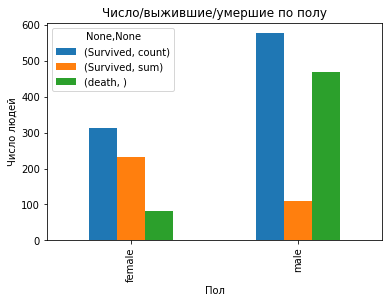

In [8]:
df_sex.set_index('Sex').plot(kind='bar')
plt.title('Число/выжившие/умершие по полу')
plt.ylabel('Число людей')
plt.xlabel('Пол')

# 3

In [22]:
import numpy as np
df.head()

,rating,year,year_
0,0.5,2012,1239
1,0.5,2013,637
2,0.5,2014,1563
3,0.5,2015,9003
4,0.5,2016,1946


In [10]:
df['decade'] = df['Age'] // 10 * 10

In [11]:
table = pd.pivot_table(df, values='PassengerId', index=['Survived', 'Pclass'], columns='decade', aggfunc=pd.Series.count ) \
        .fillna(0).round(0)

## Распределение погибших и выживших по возрасту/классу каюты

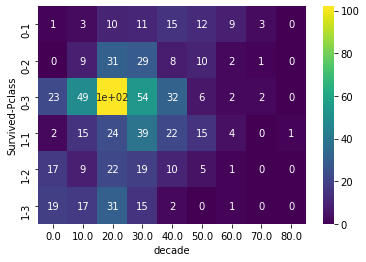

In [12]:
ax = sns.heatmap(table, cmap='viridis', annot=True)

In [13]:
table

decade           0.0   10.0   20.0  30.0  40.0  50.0  60.0  70.0  80.0
Survived Pclass                                                       
0        1        1.0   3.0   10.0  11.0  15.0  12.0   9.0   3.0   0.0
         2        0.0   9.0   31.0  29.0   8.0  10.0   2.0   1.0   0.0
         3       23.0  49.0  102.0  54.0  32.0   6.0   2.0   2.0   0.0
1        1        2.0  15.0   24.0  39.0  22.0  15.0   4.0   0.0   1.0
         2       17.0   9.0   22.0  19.0  10.0   5.0   1.0   0.0   0.0
         3       19.0  17.0   31.0  15.0   2.0   0.0   1.0   0.0   0.0

# 4


Дата сет о цене домов, сравниваем статистики по разным локациям

In [59]:
df = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Text(0.5, 0.98, '')

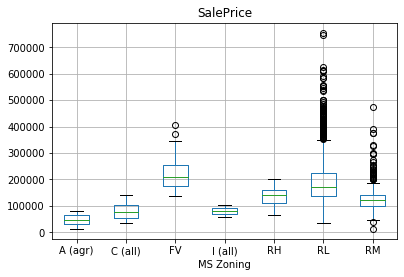

In [60]:
ax = df.boxplot(column='SalePrice', by='MS Zoning')
ax.get_figure().suptitle('')

In [68]:
df.groupby('MS Zoning', as_index=False).aggregate({'SalePrice': 'sum'}).sort_values(by='SalePrice', ascending=False).head(1)


,MS Zoning,SalePrice
5,RL,434786831


Text(0.5, 1.0, 'Среднегодичная динамика цен в районе RL')

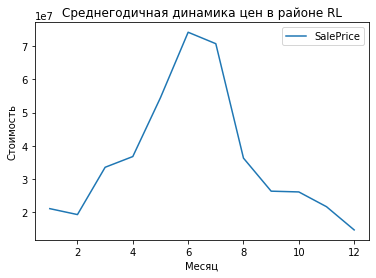

In [103]:
df = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)
df = df.loc[df['MS Zoning'] == 'RL',:].sort_values(by='Yr Sold', ascending=False)
df = df[['SalePrice', 'Mo Sold']].groupby('Mo Sold', as_index=False).aggregate({'SalePrice':'sum'})

df.plot(x='Mo Sold', y='SalePrice')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.title('Среднегодичная динамика цен в районе RL')